In [1]:
import warnings
warnings.filterwarnings("ignore")

# Loading all libraries
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import os 
os.chdir(r"C:\Users\Shakir Mehboob\Desktop\Term 2\Project") #Location Path my laptop

In [3]:
data=pd.read_csv("oxygen_crises.csv")
data.head()

,user,location,source,place,created_at,geo_enabled,friends_count,text,retweet_count,retweeted_status
0,galabhupesh,NaN,Twitter for Android,NaN,2021-05-09 15:40:48,True,524,@ANI When Court asked for Oxygen Audits and wh...,0,False
1,its_sreedhar,NaN,Twitter for Android,NaN,2021-05-09 15:40:48,True,217,AP gov sanctioned 310cr for 49 oxygen plants f...,0,False
2,khansahilrehab,"Patna, India",Twitter for iPhone,NaN,2021-05-09 15:40:48,False,337,@thevirdas Only Oxygen and steroids seem to wo...,0,False
3,ArunGarimella,"Vijayawada, India",Twitter for Android,NaN,2021-05-09 15:40:46,False,93,"Sir, Need Oxygen bed urgently in Vijayawada , ...",0,False
4,iprachi_singh,"Rajasthan, India",Twitter for Android,NaN,2021-05-09 15:40:45,False,926,@dulcetchani @TajinderBagga @yuvahallabol I th...,0,False


In [4]:
data=pd.DataFrame(data.text)
data.head()

,text
0,@ANI When Court asked for Oxygen Audits and wh...
1,AP gov sanctioned 310cr for 49 oxygen plants f...
2,@thevirdas Only Oxygen and steroids seem to wo...
3,"Sir, Need Oxygen bed urgently in Vijayawada , ..."
4,@dulcetchani @TajinderBagga @yuvahallabol I th...


In [5]:
data.iloc[11,0]

'COVID-19: Oxygen Crunch and Defunct Ventilators Endanger Lives in Bihar\n@shahfaisalBR  https://t.co/2GG6WQ8JuF'

## Data Cleaning

### Step-1 : converting in lower case

In [6]:
data.text=data.text.str.lower()

In [7]:
data.iloc[11,0]

'covid-19: oxygen crunch and defunct ventilators endanger lives in bihar\n@shahfaisalbr  https://t.co/2gg6wq8juf'

### Step-2 : Removing Punctuation

In [8]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [9]:
def remove_punctuation(text):
    text_nopunt="".join([c for c in text if c not in string.punctuation])
    return text_nopunt

In [10]:
data['text']=data['text'].apply(lambda x : remove_punctuation(x))

In [11]:
data.iloc[11,0]

'covid19 oxygen crunch and defunct ventilators endanger lives in bihar\nshahfaisalbr  httpstco2gg6wq8juf'

### Step- 3 : Removing URl

In [12]:
data['text'] = data['text'].str.replace(r'http\S+|www.\S+','',case=False)
data.iloc[11,0]

'covid19 oxygen crunch and defunct ventilators endanger lives in bihar\nshahfaisalbr  '

### Step-4 : Removing Number

In [13]:
data.iloc[122,0]

'bhopal madhyapradesh \n\nsrijan hospital bhopal\n oxygen beds amp icu beds \n \ncontact no 7000306261\n\nnote please d… '

In [14]:
data['text'] = data['text'].str.replace('\d+','')
data.iloc[122,0]

'bhopal madhyapradesh \n\nsrijan hospital bhopal\n oxygen beds amp icu beds \n \ncontact no \n\nnote please d… '

### Step-5 : Removing stop words

In [15]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('english')
stop

[nltk_data] Downloading package stopwords to C:\Users\Shakir
[nltk_data]     Mehboob\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [16]:
data.iloc[11,0]

'covid oxygen crunch and defunct ventilators endanger lives in bihar\nshahfaisalbr  '

In [17]:
data['text'] = data['text'].apply(lambda x: ' '.join([word for word in x.split() #
                                                      if word not in (stop)]))
data.iloc[11,0]

'covid oxygen crunch defunct ventilators endanger lives bihar shahfaisalbr'

### Step-6 Common Words

In [18]:
import re # replace of words
nltk.download('words') # dictionary 
words = set(nltk.corpus.words.words())
words

[nltk_data] Downloading package words to C:\Users\Shakir
[nltk_data]     Mehboob\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


{'spongicolous',
 'uricaciduria',
 'munificence',
 'perspicuously',
 'underset',
 'prehend',
 'laryngoscopical',
 'uncontaminable',
 'pedaler',
 'genethlic',
 'counteractivity',
 'typholysin',
 'dissemination',
 'scrimer',
 'personality',
 'indexer',
 'glassophone',
 'ming',
 'mistry',
 'brochan',
 'phleboidal',
 'counterattractively',
 'portraiture',
 'quadrigeminate',
 'scrieve',
 'sorrower',
 'angioataxia',
 'hoofbeat',
 'dendric',
 'Isabelline',
 'rating',
 'fingerhook',
 'superdiabolical',
 'ungroaning',
 'bacteric',
 'Formol',
 'Comptonia',
 'hexaphyllous',
 'impedingly',
 'Mousterian',
 'overdischarge',
 'doubtlessly',
 'subbronchial',
 'borealis',
 'chalcus',
 'reassuredly',
 'recurl',
 'clacker',
 'hemagglutinative',
 'Ribbonism',
 'unreplying',
 'beround',
 'bilby',
 'shoreman',
 'Bessemer',
 'nonsympathizer',
 'amphicoelian',
 'Diego',
 'fontinalaceous',
 'misuse',
 'paleologist',
 'thwart',
 'tyrannously',
 'reactivation',
 'recording',
 'unruinated',
 'undershrubby',
 'ref

In [30]:
data.iloc[565,0]

'shekhargupta see state purchasing vaccines exploring avenues commissions let states manage oxygen…'

In [21]:
data.iloc[150,0]

'rantinggirl verified worked making oxygen available cases know attendant may…'

In [22]:
data.iloc[200,0]

'ibcnews sad…right health perhaps right oxygen bed medicinemedical support… exi…'

In [23]:
data.iloc[300,0]

'bku media incharge dharmendra malik said protestors drinking kaadha nimbu paani improve immunity s…'

In [31]:
# Applying a second round of cleaning
def clean_text_round2(text):
    '''Get read of some additional punctuation and non-sensical text that was missed the first time around.'''
    text = re.sub('government|politics|stategovernment|centralgovernment', '', text) # removing government
    text = re.sub('protests|protest', '', text) #remove protest
    text = re.sub(r"\b[a-zA-Z]\b", "", text) # albhabets like a or s
    text = re.sub(r"b[a-zA-Z][a-zA-Z]\b", "", text) # albhabets like ab or ad
    text =  " ".join(w for w in nltk.wordpunct_tokenize(text)  ## this will give you tokens 
                    if w.lower() in words)
    return text
round2 = lambda x: clean_text_round2(x)

In [40]:
data = pd.DataFrame(data.text.apply(round2))
data.iloc[300,0]

'media malik said drinking improve immunity'

### Step- 7 Lemmatization

In [37]:
from nltk.stem import WordNetLemmatizer
import nltk
nltk.download('wordnet')
lemmatizer = WordNetLemmatizer()
w_tokenizer = nltk.tokenize.WhitespaceTokenizer()

[nltk_data] Downloading package wordnet to C:\Users\Shakir
[nltk_data]     Mehboob\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [38]:
def lemmatize_text(text):
    return [lemmatizer.lemmatize(w,"v") for w in w_tokenizer.tokenize(text)]

In [41]:
data.iloc[300,0]

'media malik said drinking improve immunity'

In [42]:
data['text'] = data.text.apply(lambda x : ' '.join(lemmatize_text(x)))
data.iloc[300,0]

'media malik say drink improve immunity'

### step-8 Strip extra whitespace

In [43]:
data['text'] = (data['text'].astype("str").str.rstrip())
data.iloc[300,0]

'media malik say drink improve immunity'

## Term Document Matrix

In [44]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(stop_words='english')
data_cv = cv.fit_transform(data.text)
data_dtm = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names())

tdm = data_dtm.transpose()
tdm.head()

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
aa,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
abide,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ability,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
absence,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
absolute,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [45]:
tdm['freq'] = tdm.sum(axis=1)
tdm.head()

,0,1,2,3,4,5,6,7,8,9,...,991,992,993,994,995,996,997,998,999,freq
aa,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
abide,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
ability,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
absence,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
absolute,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [46]:
tdm.reset_index(inplace=True)
tdm.head()

,index,0,1,2,3,4,5,6,7,8,...,991,992,993,994,995,996,997,998,999,freq
0,aa,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,abide,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
2,ability,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,absence,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,absolute,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [48]:
tdm1=tdm[["index","freq"]]
tdm1.rename(columns = {'index':'Word'}, inplace = True)
tdm1.sort_values(by='freq',ascending=False,inplace=True)
tdm1.head(25)

,Word,freq
819,oxygen,760
780,need,147
536,hospital,89
241,covid,73
517,help,65
840,people,49
259,cylinder,49
1072,sir,49
837,patient,48
653,level,44


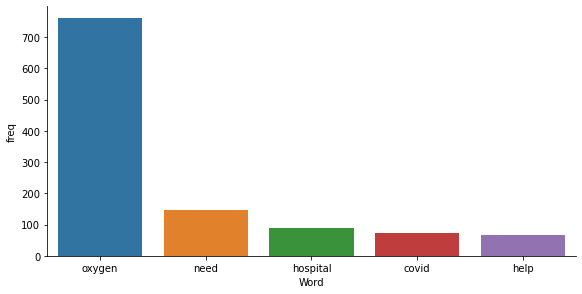

In [52]:
import seaborn as sns
w = tdm1[tdm1['freq']>=50]
fg = sns.factorplot(x='Word', y='freq',
                   size=4, aspect=2,
                   kind= 'bar',
                   data=w)

## Word Cloud

In [57]:
import os
os.chdir(r"C:\Users\Shakir Mehboob\Desktop\Term 2\Project")

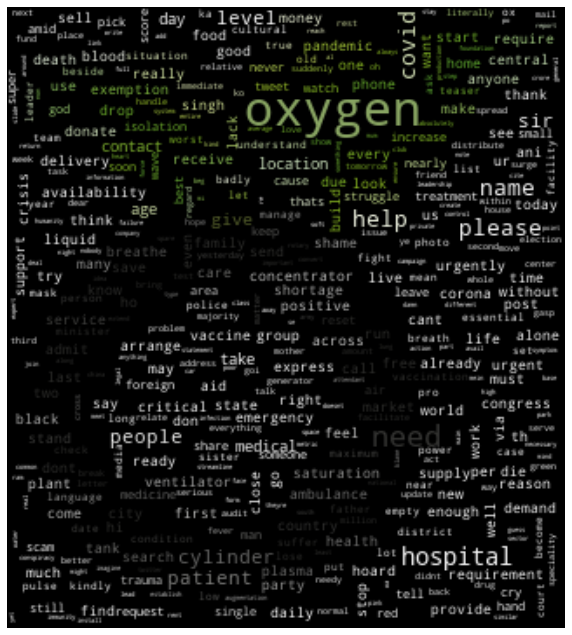

In [61]:
from PIL import Image

mask = np.array(Image.open("oxygen.png"))
wordcloud_full = WordCloud(stopwords=stopwords,background_color='black',
                           mode="RGBA",
                           max_words=27000,
                           mask=mask,
                           collocations=False).generate(text)

# create coloring
image_colors = ImageColorGenerator(mask)
plt.figure(figsize=[10,15])  # facecolor='k' to give round box
plt.imshow(wordcloud_full.recolor(color_func=image_colors), interpolation="bilinear")
plt.axis("off")
plt.show()

## Sentiment Analysis

In [63]:
from textblob import TextBlob

pol = lambda x: TextBlob(x).sentiment.polarity
data['polarity'] = data['text'].apply(pol)
data.head(10)

,text,polarity
0,ani court oxygen near get catch say enough,0.05
1,oxygen say become operational within,0.00
2,oxygen seem work rest equivocal evidence prone...,0.00
3,sir need oxygen urgently patient name age contact,0.00
4,think normal oxygen,0.15
5,need oxygen cylinder aunt kindly help,0.60
6,,0.00
7,please vaccinate test people please,0.00
8,know company would sell oxygen concentrator wo...,0.00
9,yah concept they re us oxygen please send,0.00


In [64]:
data['Sentiment'] = np.where(data['polarity']>=0, 'Positive', 'Negative')
data.head()

,text,polarity,Sentiment
0,ani court oxygen near get catch say enough,0.05,Positive
1,oxygen say become operational within,0.00,Positive
2,oxygen seem work rest equivocal evidence prone...,0.00,Positive
3,sir need oxygen urgently patient name age contact,0.00,Positive
4,think normal oxygen,0.15,Positive


<AxesSubplot:>

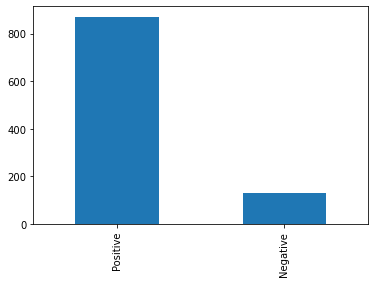

In [65]:
data.Sentiment.value_counts().plot.bar()

In [66]:
data.Sentiment.value_counts()

Positive    871
Negative    129
Name: Sentiment, dtype: int64